In [26]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

# solve LP
m = GEKKO(remote=False)
x1,x2 = m.Array(m.Var,2,lb=0)
m.Equations([0.5*x1+0.25*x2<=25,0.1*x1+0.03*x2>=3,0.01*x1+0.01*x2>=0.5,x1>=0,x2>=0])
m.Minimize(5*x1+2.5*x2)
#m.Minimize(5*x1+5*x2)
m.solve(disp=False)
x1opt = x1.value[0]; x2opt = x2.value[0]
print('x1 = ',x1opt)
print('x2 = ',x2opt)
print('z = ',5*x1opt+2.5*x2opt)
#print('z = ',5*x1opt+5*x2opt)

x1 =  21.428571714
x2 =  28.571427286
z =  178.571426785


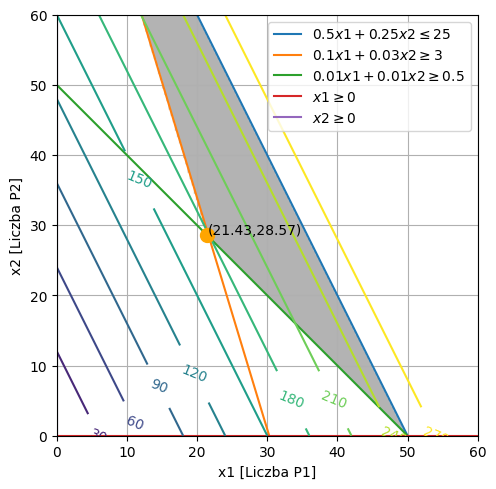

In [27]:
# visualize solution
g = np.linspace(0,60,200)
x,y = np.meshgrid(g,g)
obj = 5*x+2.5*y
#obj = 5*x+5*y
plt.imshow(((0.5*x+0.25*y<=25)&(0.1*x+0.03*y>=3)&(0.01*x+0.01*y>=0.5)&(x>=0)&(y>=0)).astype(int),
    extent=(x.min(),x.max(),y.min(),y.max()),origin='lower',cmap='Greys',alpha=0.3);
# plot constraints
x0 = np.linspace(0, 60, 200)
y0 = 100-2*x0   # 6*x+4*y<=24
y1 = 99.9-3.3*x0   # x+2*y<=6
y2 = 50-x0

y5 = 0*x0

plt.plot(x0, y0, label=r'$0.5x1+0.25x2\leq25$')
plt.plot(x0, y1, label=r'$0.1x1+0.03x2\geq3$')
plt.plot(x0, y2, label=r'$0.01x1+0.01x2\geq0.5$')


plt.plot(x0, y5, label=r'$x1\geq0$')
plt.plot([0,0],[0,60], label=r'$x2\geq0$')
xv = [round(x1opt,2)]; yv = [round(x2opt,2)]
#plt.plot(xv,yv,'ko--',markersize=7,linewidth=2)
for i in range(len(xv)):
    plt.text(xv[i]+0.1,yv[i]+0.1,f'({xv[i]},{yv[i]})')
# objective contours
CS = plt.contour(x,y,obj,np.arange(0,290,30))
plt.clabel(CS, inline=1, fontsize=10)
# optimal point
plt.plot([x1opt],[x2opt],marker='o',color='orange',markersize=10)
plt.xlim(0,60); plt.ylim(0,60); plt.grid(); plt.tight_layout()
plt.legend(loc=1); plt.xlabel('x1 [Liczba P1]'); plt.ylabel('x2 [Liczba P2]')
plt.savefig('plot.png',dpi=300)
plt.show()

In [ ]:
#Po zmianie ceny paszy drugiej rozwiązaniem będą punkty leżące na prostej 0.01x1+0.01x2-0.5=0 ograniczone
#przez 0.1x1+0.03x2>=3 - warunek ten spełnia też rozwiązanie dla ceny pierwotnej